### **DATASET OVERVIEW**

1. **Customer's ID**: the customer's ID.
2. **Birth Date**: the birth date of the customer.
3. **Gender**: the gender of the customer.
4. **Item Purchased**: the type of item purchased by the customer.
5. **Category**: the purchased item’s category.
6. **Purchase Amount (USD)**: amount spent by the customer for the item (USD).
7. **Location**: the customer's location.
8. **Size**: the size of the item.
9. **Color**: the color of the item.
10. **Season**: the season when the purchase occurred.
11. **Review Rating**: the rating left by the customer.
12. **Subscription Status**: the customer’s subscription status.
13. **Payment Method**: the payment method used by the customer.
14. **Shipping Type**: the shipment type of the purchase.
15. **Discount Applied**: whether discounts were applied to the purchase (yes/no).
16. **Promo Code Used**: whether promo codes were used for the purchase (yes/no).
17. **Previous Purchases**: the last purchase made by the customer (month).
18. **Preferred Payment Method**: the preferred payment method of the customer.
19. **Frequency of Purchases**: the average frequency of the customer’s purchases last year.

### **LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt, colors as mcolors, cm as cm
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

During the Data Preprocessing and EDA, I performed cardinality checks for each variable, along with dropping unnecessary columns, engineered the **Age** column from **Birth Date** and grouped the **Location** and **Color** variables, transformed inconsistent data, handled duplicates and missing values, and visualized data distributions.

#### **Read Dataset and Dataset Exploration**

In [2]:
data = pd.read_csv("2A.tsv",
                   sep = "\t")
data.head()

,Customer ID,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,1969/03/05,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,2005/07/01,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,1974/12/01,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,2003/11/21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,1979/09/13,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Birth Date                3900 non-null   object 
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   

Based on the information above, it is known that the customer dataset contains of 3900 observations and 19 columns.  
However, as **Customer ID** is a unique-identifier column, it is unneccesary for our analysis, so we can simply drop it.

#### **Cardinality Check**

In [4]:
cardinal = pd.DataFrame({
    "column name": data.columns.tolist(),
    "data type": [data[c].dtype for c in data.columns],
    "unique values": [data[c].nunique() for c in data.columns]
})
print("Cardinality Check Result:")
cardinal

Cardinality Check Result:


,column name,data type,unique values
0,Customer ID,int64,3900
1,Birth Date,object,3534
2,Gender,object,4
3,Item Purchased,object,25
4,Category,object,4
5,Purchase Amount (USD),int64,81
6,Location,object,50
7,Size,object,4
8,Color,object,25
9,Season,object,4


Based on the cardinality check above, there are some columns that will not be necessary for the analysis:  
- **Customer ID**, since it is the unique identifier, meaning that each entry has its own ID, so it won't give any specific insight for the model. However, we will be needing this column to join dataframes in order to perform clustering analysis, so we will be dropping this column later.
- **Birth Date**, since its unique value count is 3534/3900 entries, meaning that it is also almost unique for each entries. However, this column can be used to create a new feature, namely **Age**, so we will perform feature engineering first before dropping this column.  
- **Item Purchased** has too many unique values (25), and it is explained by the **Category** column, so we will drop it.

Additionally, the columns **Location**, and **Color** have too many categories, so we will recategorize them again.

#### **Feature Engineering : Age**

In [5]:
# Transform Birth Date to Date
data["Birth Date"] = pd.to_datetime(data["Birth Date"],
                                    format = "%Y/%m/%d")
print("Birth Date Column transformed to Date.")

Birth Date Column transformed to Date.


In [6]:
# Create Age Column
data["Age"] = 2025 - data["Birth Date"].dt.year
print("Age Column Created.")

Age Column Created.


In [7]:
# Check
data["Age"]

,Age
0,56
1,20
2,51
3,22
4,46
...,...
3895,41
3896,53
3897,47
3898,45


#### **Feature Engineering : Location**

In [8]:
# Display Unique Values
data["Location"].value_counts()

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
Nebraska,87
New York,87
Nevada,87


Here, I recategorize the **Location** based on its regions.  
Source : https://www.cdc.gov/nchs/hus/sources-definitions/geographic-region.htm#

In [9]:
# Group the Locations
regions = {
    "Northeast": ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    "Midwest": ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    "West": ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
    "South": ['Alabama',  'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
}

region_mapping = {state : region for region, states in regions.items() for state in states}
data['Location'] = data['Location'].map(region_mapping)
print("Location column updated.")

Location column updated.


In [10]:
# Recheck
data["Location"].value_counts()

,count
Location,
South,1271
West,1018
Midwest,937
Northeast,674


#### **Feature Engineering : Color**

In [11]:
# Display Unique Values
data["Color"].value_counts()

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159


Here, I recategorize the **Color** based on whether it is a neutral color or not.

In [12]:
# Group the Colors
colorgroups = {
    "Colorful": ['Olive', 'Green', 'Teal', 'Cyan', 'Turquoise', 'Blue', 'Indigo', 'Violet', 'Purple', 'Lavender', 'Red', 'Maroon', 'Magenta', 'Pink', 'Peach', 'Orange', 'Yellow', 'Gold'],
    "Neutral": ['Black', 'Gray', 'Charcoal', 'White', 'Beige', 'Brown', 'Silver']
}

colorgroup_mapping = {color : colorgroup for colorgroup, colors in colorgroups.items() for color in colors}
data['Color'] = data['Color'].map(colorgroup_mapping)
print("Color column updated.")

Color column updated.


In [13]:
# Recheck
data["Color"].value_counts()

,count
Color,
Colorful,2818
Neutral,1082


#### **Drop Unnecessary Columns**

In [14]:
columns = ["Birth Date", "Item Purchased"]
for c in columns:
  data = data.drop(columns = c)
  print(f"Dropped column {c}.")

Dropped column Birth Date.
Dropped column Item Purchased.


In [15]:
# Recheck
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Category                  3900 non-null   object 
 3   Purchase Amount (USD)     3900 non-null   int64  
 4   Location                  3900 non-null   object 
 5   Size                      3900 non-null   object 
 6   Color                     3900 non-null   object 
 7   Season                    3900 non-null   object 
 8   Review Rating             3900 non-null   float64
 9   Subscription Status       3900 non-null   object 
 10  Payment Method            3900 non-null   object 
 11  Shipping Type             3900 non-null   object 
 12  Discount Applied          3900 non-null   object 
 13  Promo Code Used           3900 non-null   object 
 14  Previous

Here, we have dropped the unnecessary columns, leaving us with 3900 entries and 17 columns (exc. **Customer ID**) for our model.

#### **Divide Categorical and Numerical Columns**

In [16]:
categorical = []
numerical = []

for i in data.columns:
  if 'int' in str(data[i].dtype) or 'float' in str(data[i].dtype):
    numerical.append(i)
  else:
    categorical.append(i)

numerical.remove("Customer ID")
print(f"Categorical columns: {categorical}")
print(f"Numerical columns: {numerical}")

Categorical columns: ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']
Numerical columns: ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Age']


#### **Data Transformation**

In [17]:
# Check Unique Values from Each Categorical Column
for c in categorical:
  print(data[c].value_counts(),
        '\n')

Gender
Male      2642
Female    1231
f           17
M           10
Name: count, dtype: int64 

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64 

Location
South        1271
West         1018
Midwest       937
Northeast     674
Name: count, dtype: int64 

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64 

Color
Colorful    2818
Neutral     1082
Name: count, dtype: int64 

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64 

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64 

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64 

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64 

Discount Applied
No     2223

Based on the output above, there are some inconsistencies in **Gender** column.

In [18]:
# Standardize Gender Column
data["Gender"] = data["Gender"].str.title()
data["Gender"] = data["Gender"].replace("F", "Female")
data["Gender"] = data["Gender"].replace("M", "Male")
print("Gender column standardized.")

Gender column standardized.


In [19]:
# Recheck
for c in categorical:
  print(data[c].value_counts(),
        '\n')

Gender
Male      2652
Female    1248
Name: count, dtype: int64 

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64 

Location
South        1271
West         1018
Midwest       937
Northeast     674
Name: count, dtype: int64 

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64 

Color
Colorful    2818
Neutral     1082
Name: count, dtype: int64 

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64 

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64 

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64 

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64 

Discount Applied
No     2223
Yes    1677
Name: count, dtyp

#### **Handle Duplicates**

In [20]:
# Check Duplicates
print(f"There are {data.duplicated().sum()} duplicates.")

There are 0 duplicates.


In [21]:
# Drop Duplicates
data = data.drop_duplicates().reset_index(drop = True)
print(f"Duplicates dropped.")

Duplicates dropped.


#### **Handle Missing Values**

In [22]:
# Check Missing Values
missing = pd.DataFrame({
    "column name" : data.columns.tolist(),
    "missing values": data.isnull().sum().tolist(),
    "percentage": ((data.isnull().sum()) * 100 / len(data)).tolist()
})

print("Missing Values Check Result:")
missing

Missing Values Check Result:


,column name,missing values,percentage
0,Customer ID,0,0.0
1,Gender,0,0.0
2,Category,0,0.0
3,Purchase Amount (USD),0,0.0
4,Location,0,0.0
5,Size,0,0.0
6,Color,0,0.0
7,Season,0,0.0
8,Review Rating,0,0.0
9,Subscription Status,0,0.0


Based on the dataframe above, it shows that there are no missing values on our dataset. Hence, performing further handling is unnecessary.

#### **Distribution Check**

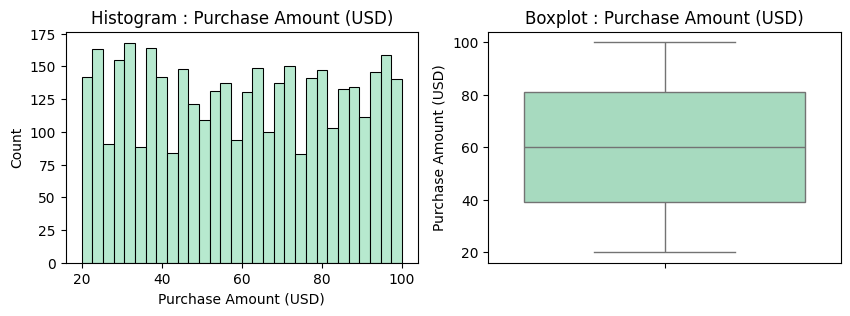

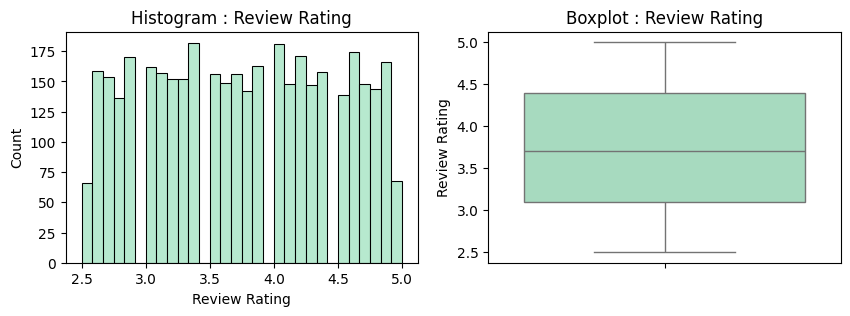

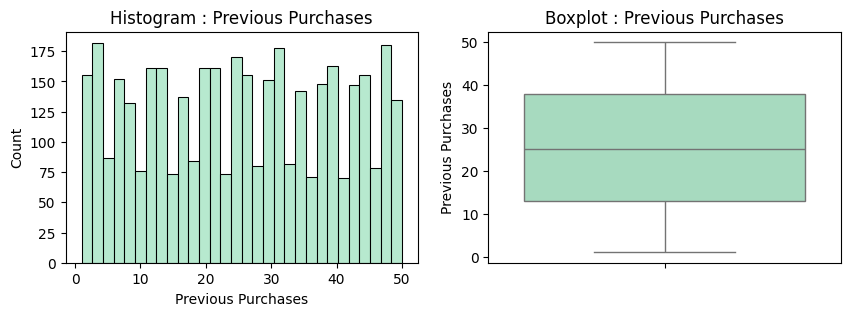

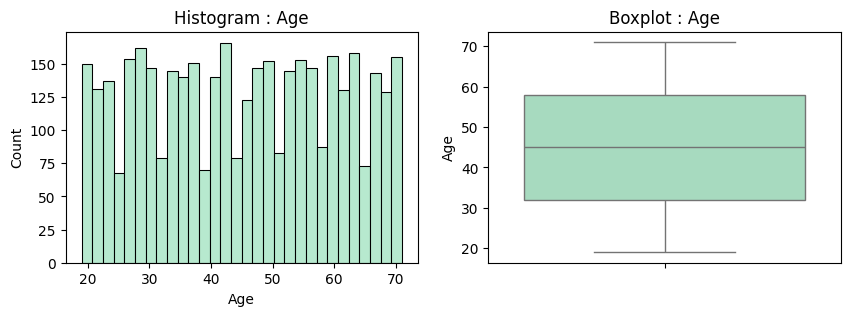

In [23]:
# Numerical Columns
def dist_check(df, columns):
  for c in columns:
    plt.figure(figsize = (10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[c],
                 bins = 30,
                 color = "#9FE2BF")
    plt.title(f"Histogram : {c}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y = df[c],
                color = "#9FE2BF")
    plt.title(f"Boxplot : {c}")

    plt.show()

dist_check(data, numerical)

From the distribution check above, all of the numerical columns have uniform distribution and there are no outliers detected. Hence, performing further handling is unnecessary.  
Furthermore, since there are no outliers, we will be scaling the data using StandardScaler.

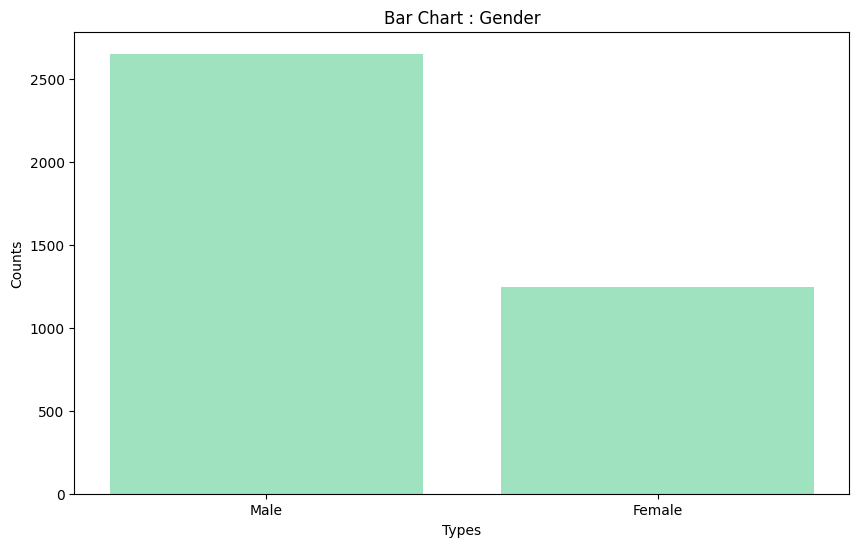

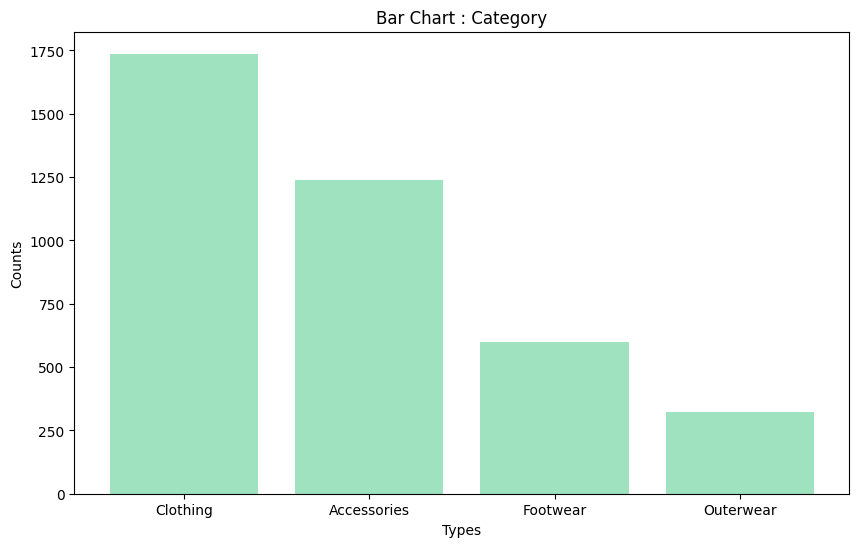

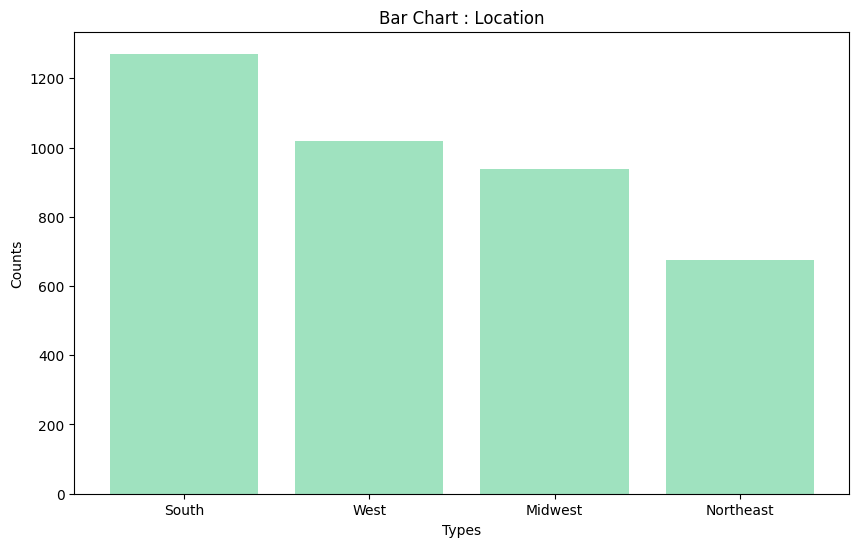

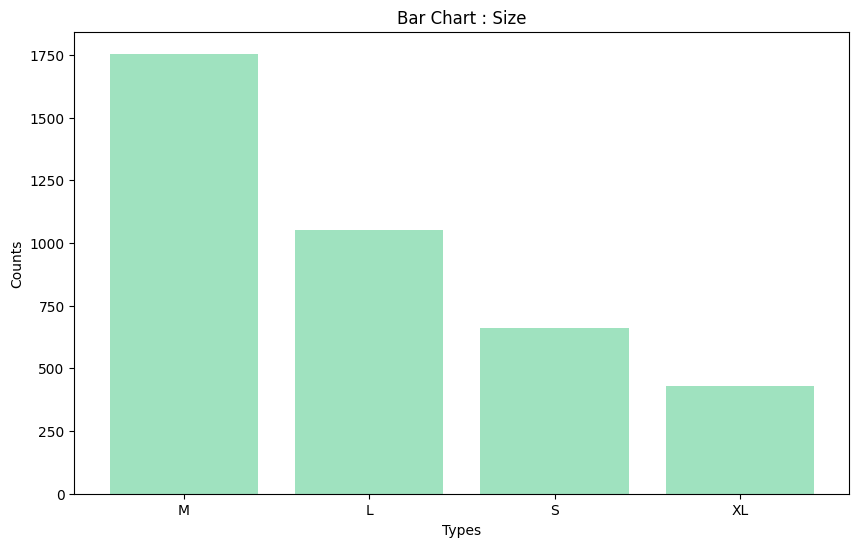

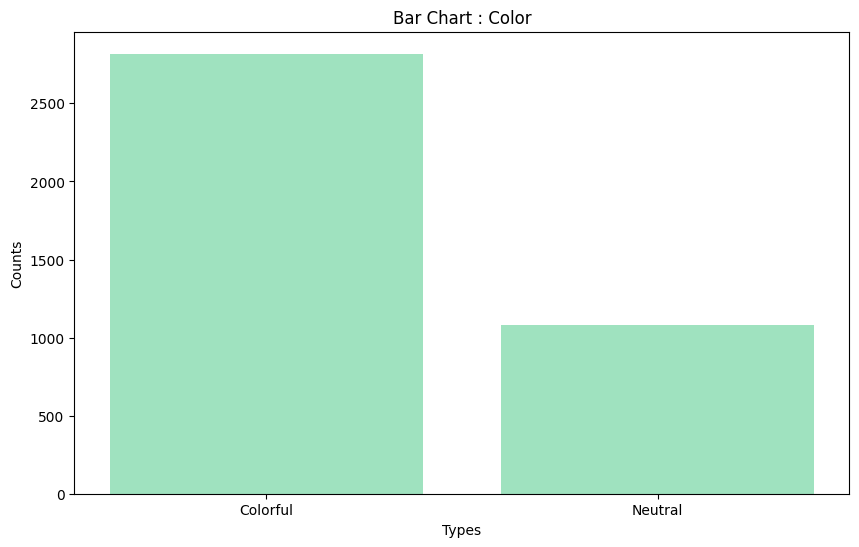

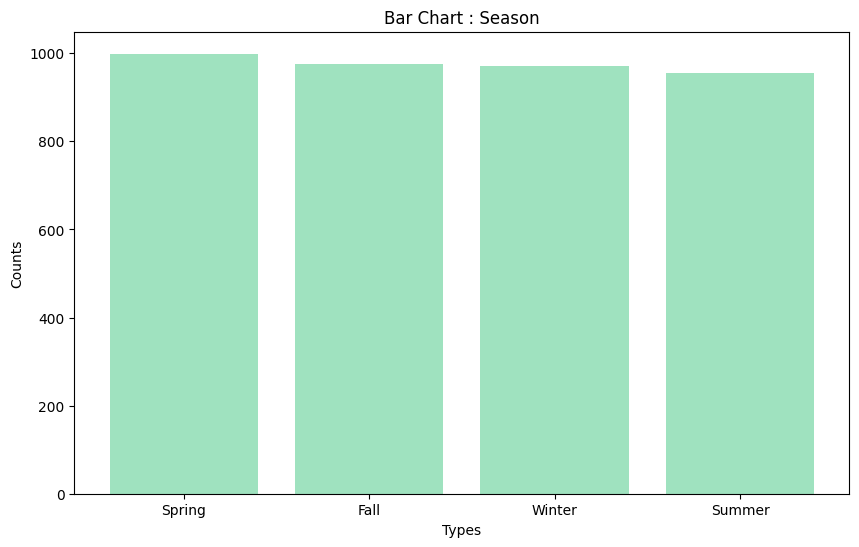

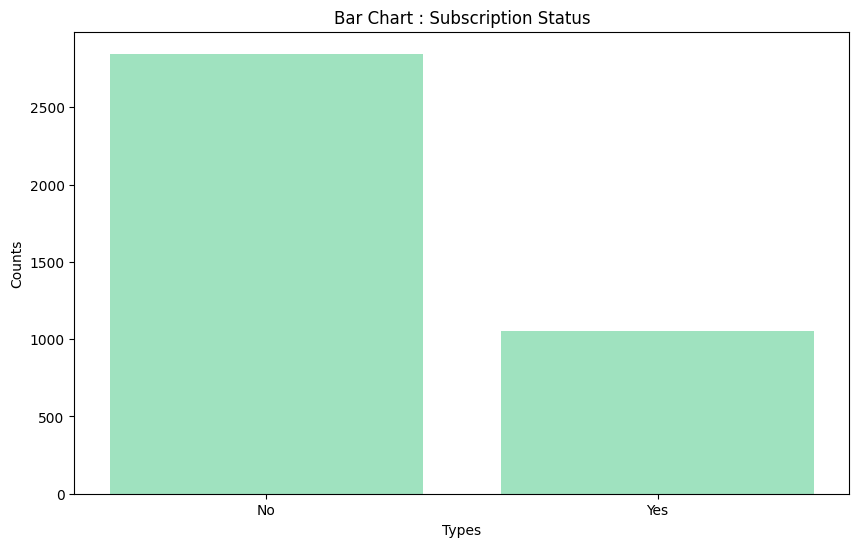

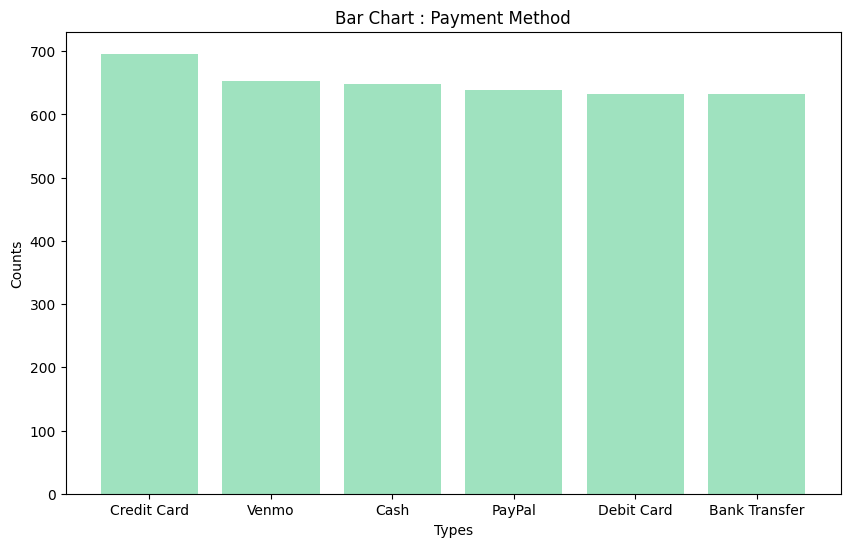

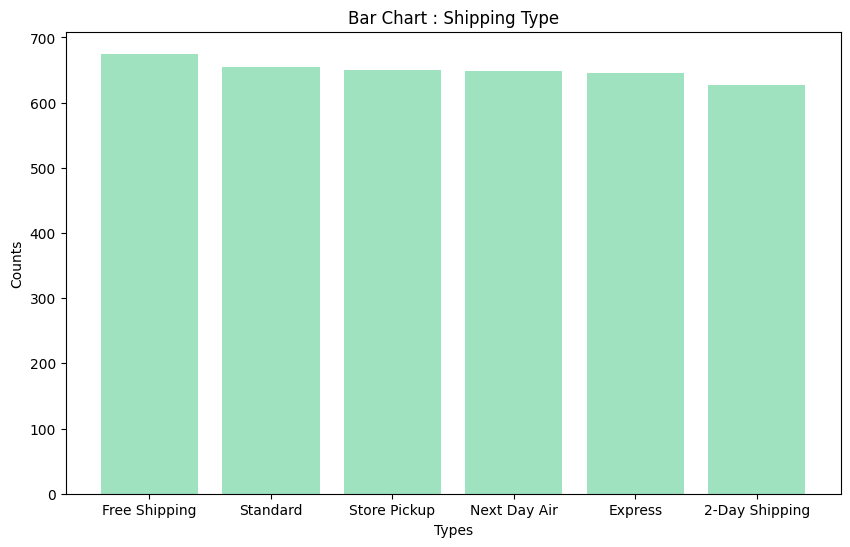

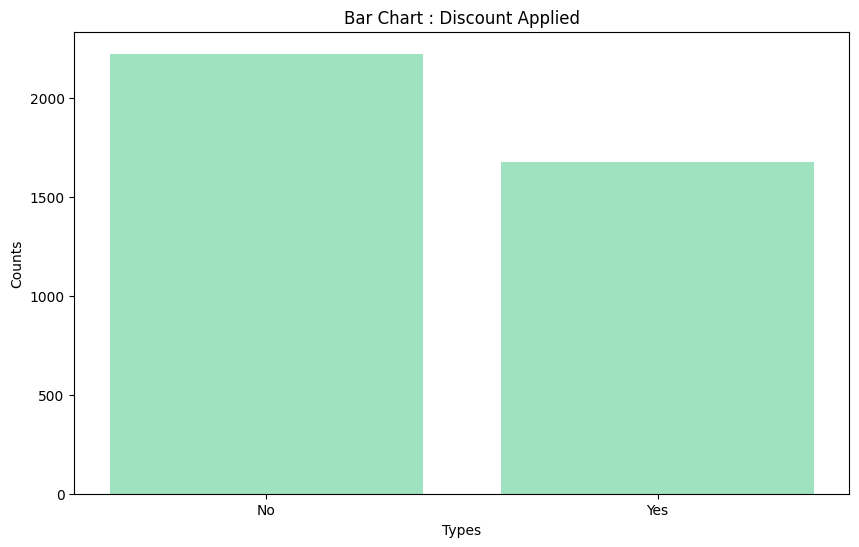

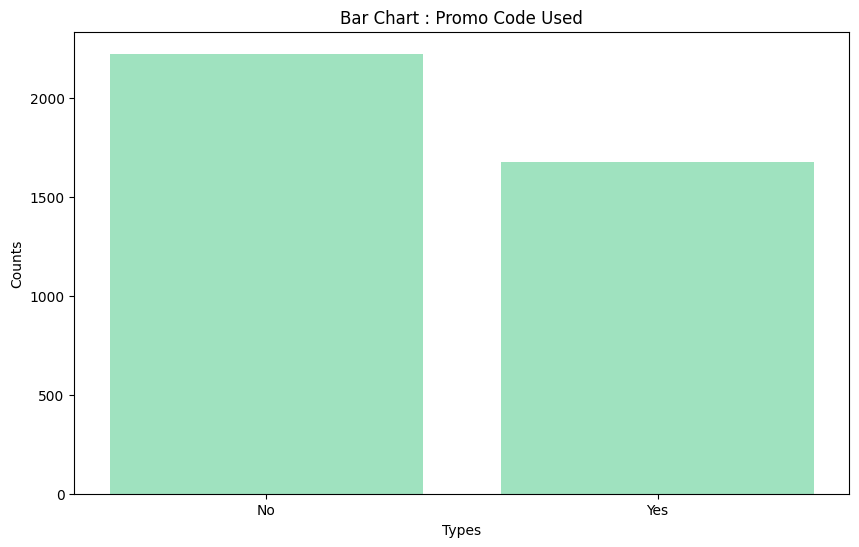

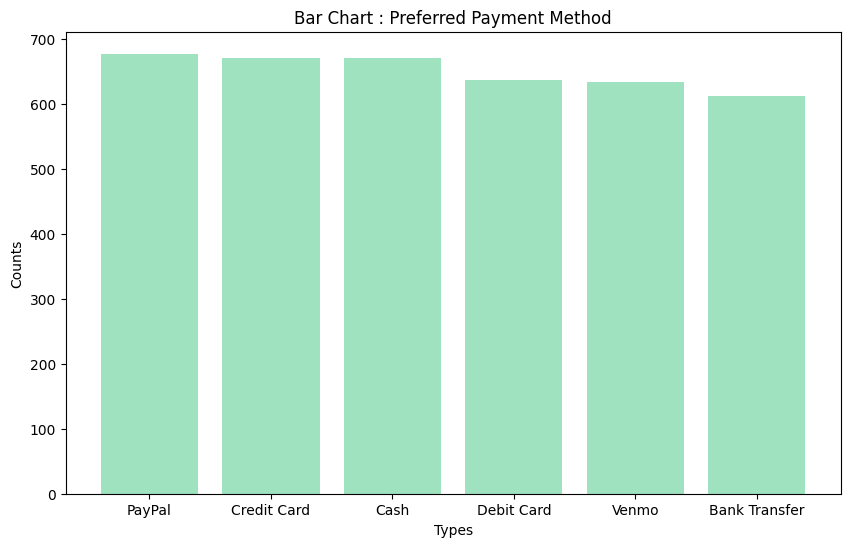

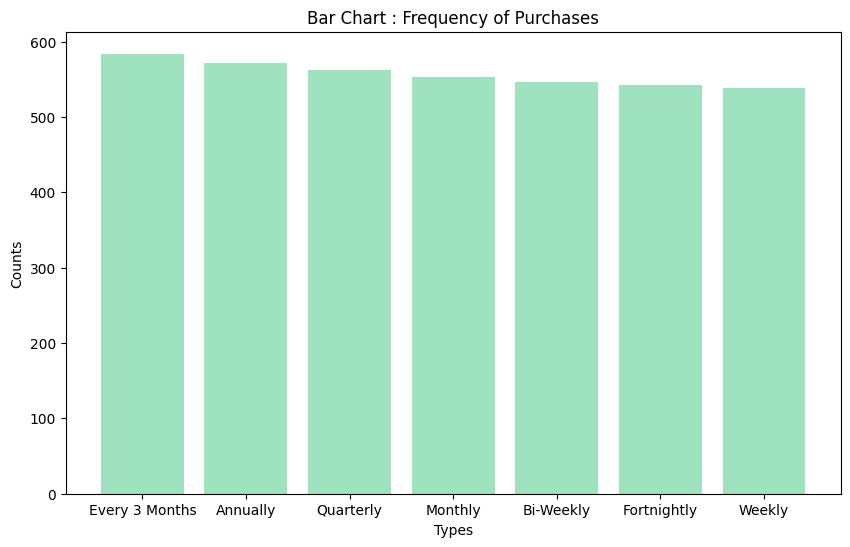

In [24]:
# Categorical Columns
def categorical_dist(df, columns):
  for c in columns:
    plt.figure(figsize = (10, 6))

    plt.bar(x = data[c].value_counts().index,
            height = data[c].value_counts().values,
            color = "#9FE2BF")
    plt.title(f"Bar Chart : {c}")
    plt.xlabel("Types")
    plt.ylabel("Counts")

    plt.show()

categorical_dist(data, categorical)

Based on the plots above:
- **Gender**: The majority of customers are male.
- **Category**: Clothing is the most popular type of item.
- **Location**: Over 1200 customers came from cities in the South.
- **Size**: Medium is the most commonly purchased size.
- **Color**: The ratio of colorful items to neutral items is approximately 3:1.
- **Season**, **Shipping Type**, **Payment Method**, **Preferred Payment Method**: Shopping behavior is not significantly influenced by the seasons, shipping types, and payment method.
- **Subscription Status**: Most of the customers don't have subscription.
- **Discount Applied**, **Promo Code Used**: More customers shop without discounts or promotions compared to those who do.
- **Frequency of Purchases**: Majority of customers tend to return after a certain interval of time

There are some imbalances in the data, such as **Gender**, **Category**, **Color**, **Size**, and **Subscription Status**. However, these imbalances make sense in real life application, so we won't be needing to perform any further sampling method.

#### **Encoding**

In [25]:
# Save Original Data for Clustering Analysis
data_ori = data.copy()

In [26]:
# Display Unique Values from Each Categorical Column
for c in categorical:
  print(data[c].value_counts(),
        '\n')

Gender
Male      2652
Female    1248
Name: count, dtype: int64 

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64 

Location
South        1271
West         1018
Midwest       937
Northeast     674
Name: count, dtype: int64 

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64 

Color
Colorful    2818
Neutral     1082
Name: count, dtype: int64 

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64 

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64 

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64 

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64 

Discount Applied
No     2223
Yes    1677
Name: count, dtyp

Based on the output above, we will use Binary Encoder for **Gender**, **Color**, **Subscription Status**, **Discount Applied**, and **Promo Code Used** columns,  
One Hot Encoder for the **Category**, **Location**, **Season**, **Payment Method**, **Shipping Type**, and **Preferred Payment Method** columns, and  
Ordinal Encoder for the **Size** and **Frequency of Purchases**.

In [27]:
# Binary Encode
binary_enc = {
    "Gender": {
        "Female": 0,
        "Male": 1
    },
    "Color": {
        "Neutral": 0,
        "Colorful": 1
    },
    "Subscription Status": {
        "No": 0,
        "Yes": 1
    },
    "Discount Applied": {
        "No": 0,
        "Yes": 1
    },
    "Promo Code Used": {
        "No": 0,
        "Yes": 1
    }
}

data = data.replace(binary_enc)
print(f"Binary Encode performed.")

Binary Encode performed.


<ipython-input-27-a2bada6d707b>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(binary_enc)


In [28]:
# One Hot Encode
colm = ["Category", "Location", "Season", "Payment Method", "Shipping Type", "Preferred Payment Method"]
ohe_enc = OneHotEncoder(sparse_output = False).set_output(transform = "pandas")
data = pd.concat([data, ohe_enc.fit_transform(data[colm]).astype('int')],
                 axis = 1)

for c in colm:
  data = data.drop(columns = c)
  categorical.remove(c)

print(f"One Hot Encode performed.")

One Hot Encode performed.


In [29]:
# Ordinal Encode
ord_enc = {
    "Size": {
        "S": 0,
        "M": 1,
        "L": 2,
        "XL": 3,
        "XXL": 4
    },
    "Frequency of Purchases": {
        "Weekly": 0,
        "Bi-Weekly": 1,
        "Fortnightly": 2,
        "Monthly": 3,
        "Every 3 Months": 4,
        "Quarterly": 5,
        "Annually": 6
    }
}

data = data.replace(ord_enc)
print(f"Ordinal Encode performed.")

Ordinal Encode performed.


<ipython-input-29-1e5dab908c7c>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(ord_enc)


In [30]:
# Recheck
for c in categorical:
  print(data[c].value_counts(),
        '\n')

Gender
1    2652
0    1248
Name: count, dtype: int64 

Size
1    1755
2    1053
0     663
3     429
Name: count, dtype: int64 

Color
1    2818
0    1082
Name: count, dtype: int64 

Subscription Status
0    2847
1    1053
Name: count, dtype: int64 

Discount Applied
0    2223
1    1677
Name: count, dtype: int64 

Promo Code Used
0    2223
1    1677
Name: count, dtype: int64 

Frequency of Purchases
4    584
6    572
5    563
3    553
1    547
2    542
0    539
Name: count, dtype: int64 



Here, we have encoded all of the categorical columns to numerical forms.

### **MODELLING AND FINE TUNING**

#### **Scaling**

In [31]:
std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform(data)
print(f"Scaling performed.")

Scaling performed.


As mentioned before, we use StandardScaler, since there are no outliers in the numerical columns.

#### **Dimensionality Reduction**

Text(0, 0.5, 'Eigenvalues')

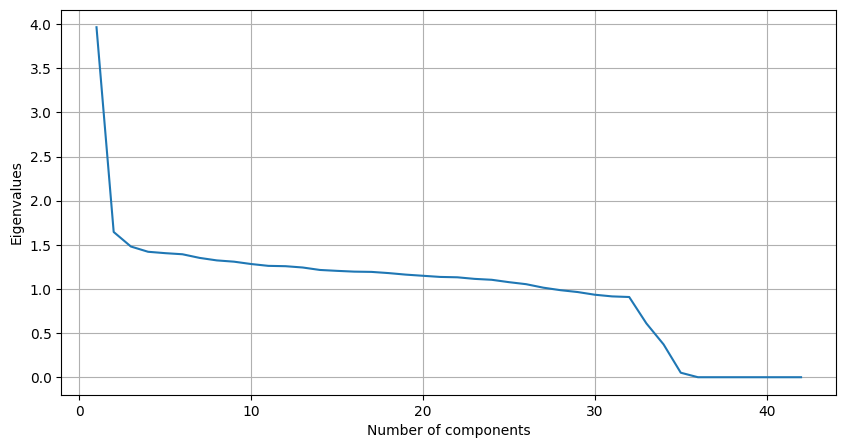

In [32]:
pca = PCA()
pca.fit(data_scaled)
plt.figure(figsize = (10, 5))
plt.grid()
plt.plot(range(1, len(data.columns) + 1),
         pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

I applied PCA for dimensionality reduction to simplify the data, as the encoded dataset has so many columns.  
I identified the optimal number of components by finding the elbow from the eigenvalue plot. From the plot above, the optimal number of components in the PCA is around 2-3.

In [33]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)
print(f"Dimensionality Reduction performed.")

Dimensionality Reduction performed.


#### **Fine Tuning : K-Means Clustering**

To determine the best k value for the K-Means Clustering, I fine tuned the model using the Elbow method and Silhouette method.

In [34]:
distortions = []
silhouettes = []

K = range(2, 10)

for k in K:
  model = KMeans(n_clusters = k,
                 random_state = 7)
  pred = model.fit_predict(data_pca)
  distortions.append(model.inertia_)
  silhouettes.append(silhouette_score(data_pca,
                                      pred))

print(f"K-Means Fine Tuning performed.")

K-Means Fine Tuning performed.


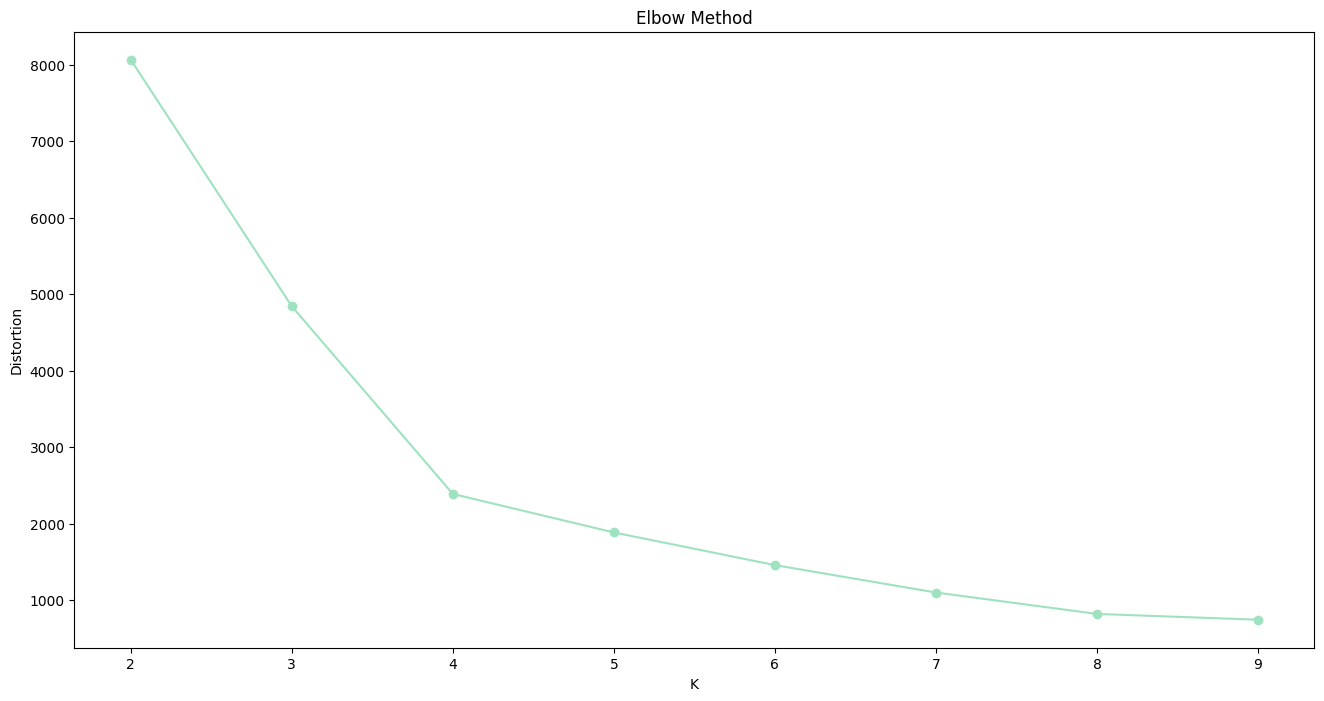

In [35]:
# Elbow Method
plt.figure(figsize = (16, 8))

plt.plot(K,
         distortions,
         marker = "o",
         color = "#9FE2BF")
plt.xlabel("K")
plt.ylabel("Distortion")
plt.title("Elbow Method")

plt.show()

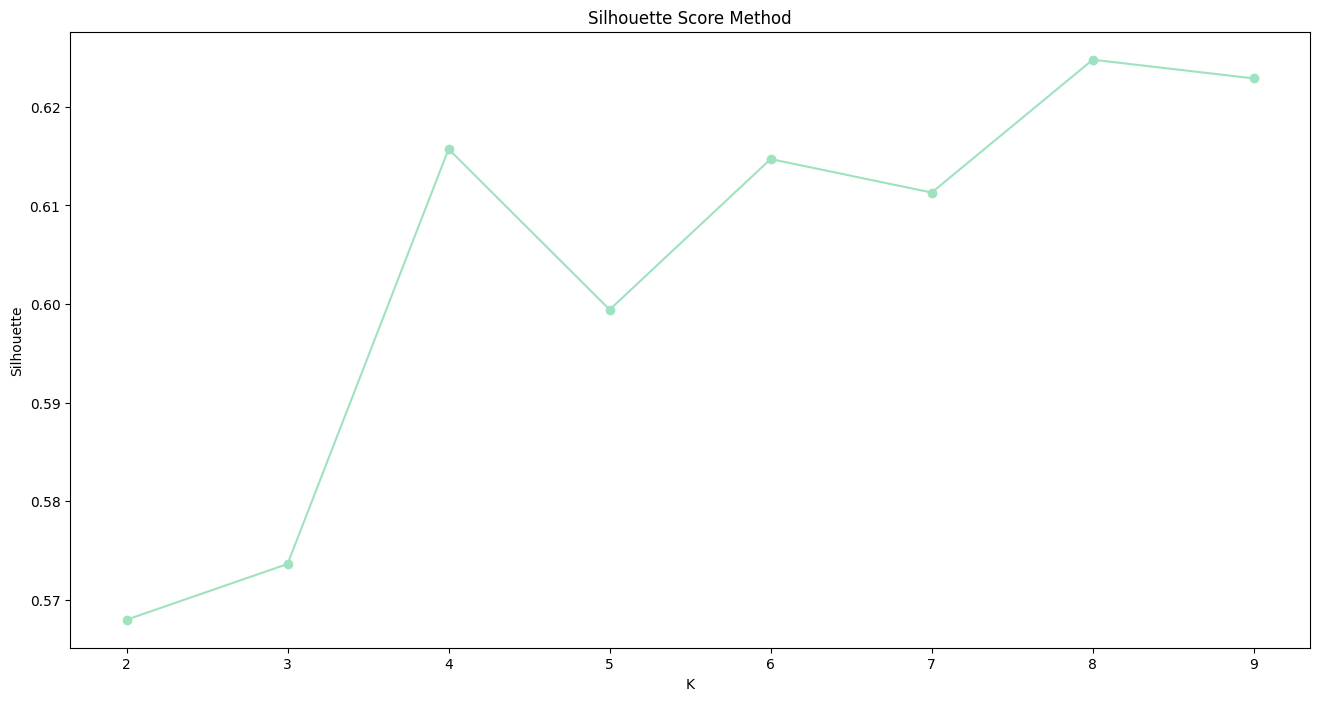

In [36]:
# Silhouette Method
plt.figure(figsize = (16, 8))

plt.plot(K,
         silhouettes,
         marker = "o",
         color = "#9FE2BF")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.title("Silhouette Score Method")

plt.show()

Based on the plots above, the most optimal number of clusters (k) is 8. However, I don’t think it's effective to cluster customers into 8 different groups, because it will be hard to maintain. Hence, we will be using the second optimal k, which is 4.

#### **Modeling**

In [37]:
# Modeling
model = KMeans(n_clusters = 4,
               random_state = 7)
pred = model.fit_predict(data_pca)
data_pred = data.copy()
data_pred["cluster"] = pred

print(f"Modeling performed.")

Modeling performed.


#### **Cluster Visualization**

Text(0, 0.5, 'PC2')

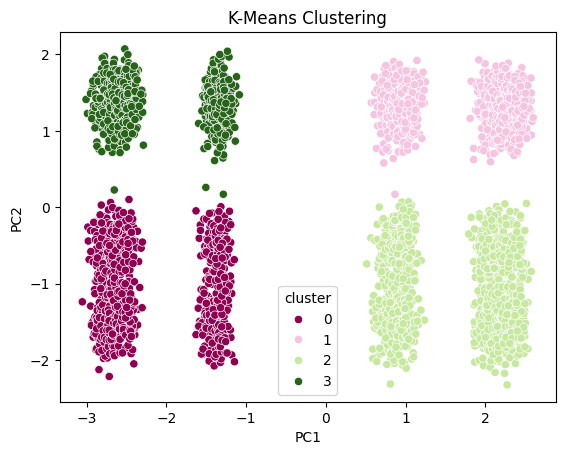

In [38]:
sns.scatterplot(x = data_pca[:, 0],
                y = data_pca[:, 1],
                hue = data_pred["cluster"],
                palette = "PiYG")
plt.title("K-Means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

### **CLUSTER ANALYSIS**

#### **Clustering Analysis**

In [39]:
# Merge Original Data with Cluster
df = pd.merge(data_ori, data_pred[["Customer ID", "cluster"]], on = "Customer ID")
df.head()

,Customer ID,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age,cluster
0,1,Male,Clothing,53,South,L,Neutral,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,56,3
1,2,Male,Clothing,64,Northeast,L,Colorful,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,20,3
2,3,Male,Clothing,73,Northeast,S,Colorful,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,51,3
3,4,Male,Footwear,90,Northeast,M,Colorful,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,22,0
4,5,Male,Clothing,49,West,M,Colorful,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,46,3


In [40]:
# Remove Customer ID
df = df.drop(columns = "Customer ID")
print("Customer ID dropped.")

Customer ID dropped.


In [41]:
# Divide Categorical and Numerical Columns
categorical = []
numerical = []

for i in df.columns:
  if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
    numerical.append(i)
  else:
    categorical.append(i)

numerical.remove("cluster")
print(f"Categorical columns: {categorical}")
print(f"Numerical columns: {numerical}")

Categorical columns: ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']
Numerical columns: ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Age']


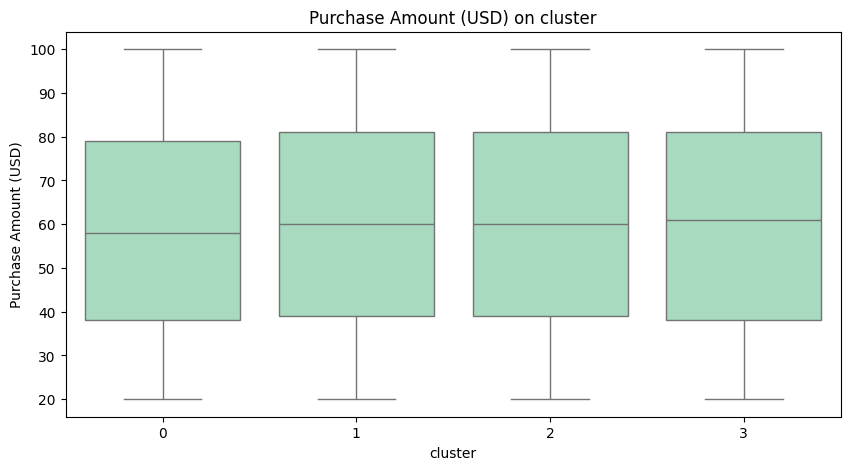

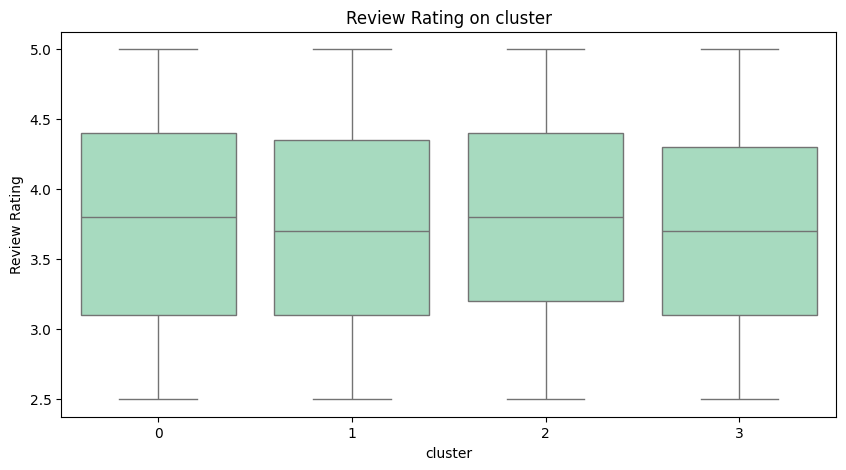

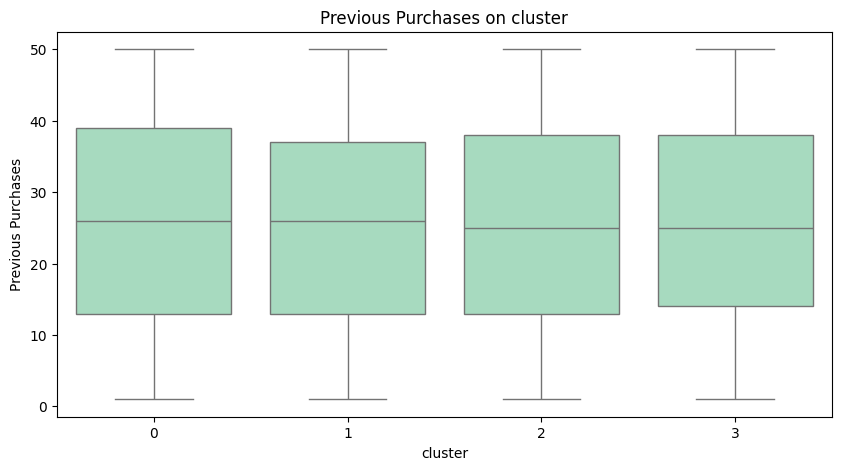

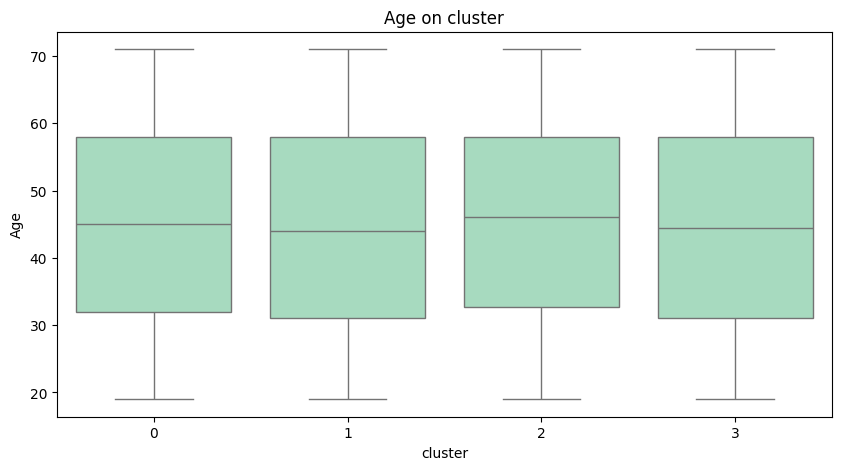

In [42]:
# Numerical
def num_with_y(data, cols, target):
  for c in cols:
    plt.figure(figsize = (10, 5))

    sns.boxplot(x = data[target],
                y = data[c],
                color = "#9FE2BF")
    plt.title(f"{c} on {target}")

    plt.show()

num_with_y(df,
           numerical,
           "cluster")

In [43]:
for c in numerical:
  pivot_df = pd.pivot_table(df,
                            values = c,
                            index = 'cluster',
                            aggfunc = 'mean')
  display(pivot_df)

,Purchase Amount (USD)
cluster,
0,58.833510
1,60.230387
2,60.047697
3,59.851499


,Review Rating
cluster,
0,3.764475
1,3.732373
2,3.778701
3,3.707766


,Previous Purchases
cluster,
0,25.952280
1,24.973188
2,25.125000
3,25.474114


,Age
cluster,
0,45.380700
1,44.679245
2,45.285362
3,44.841962


Based on the plots above, the numerical columns (**Purchase Amount (USD)**, **Review Rating**, **Previous Purchases**, and **Age**) don't really have a significant impact on determining the clusters, since they variates around the same range for all clusters.

<Figure size 1000x500 with 0 Axes>

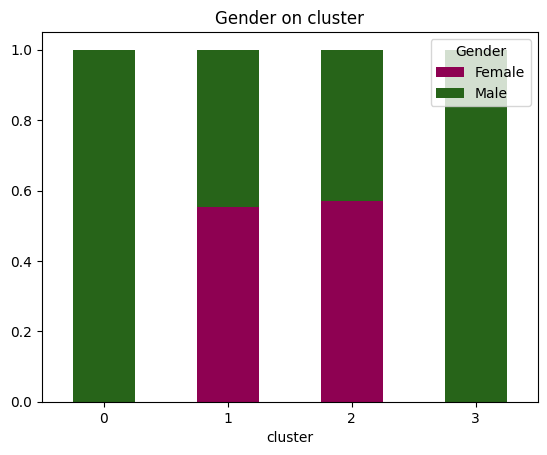

<Figure size 1000x500 with 0 Axes>

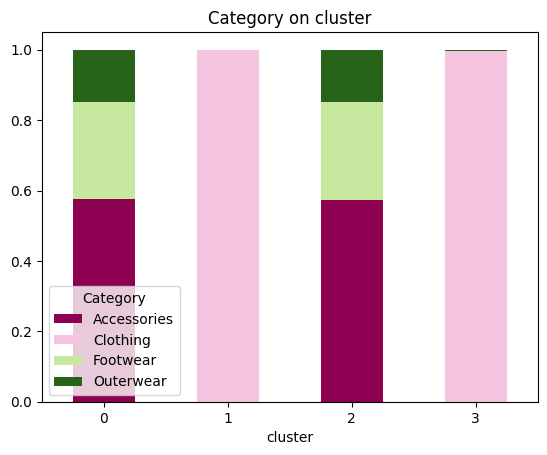

<Figure size 1000x500 with 0 Axes>

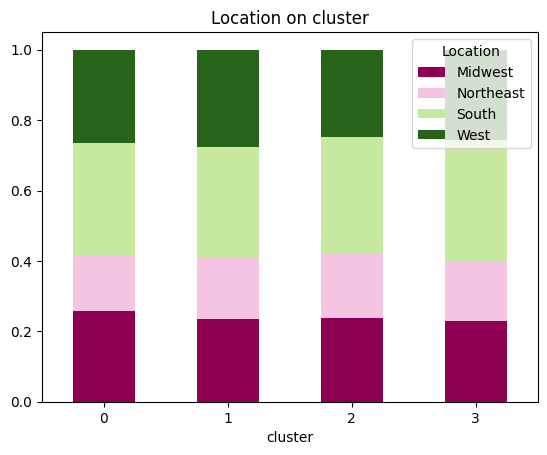

<Figure size 1000x500 with 0 Axes>

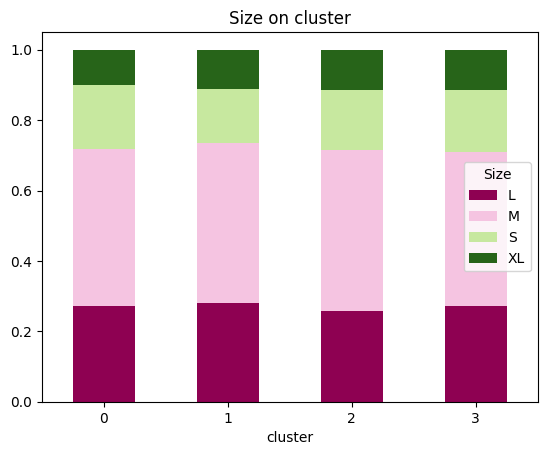

<Figure size 1000x500 with 0 Axes>

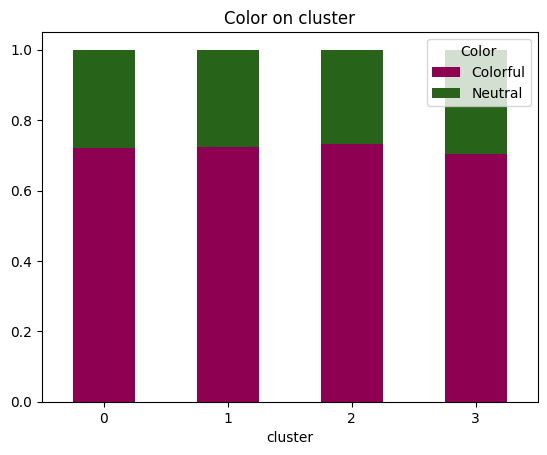

<Figure size 1000x500 with 0 Axes>

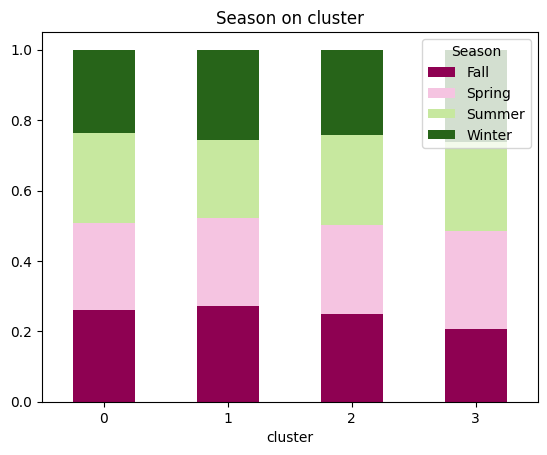

<Figure size 1000x500 with 0 Axes>

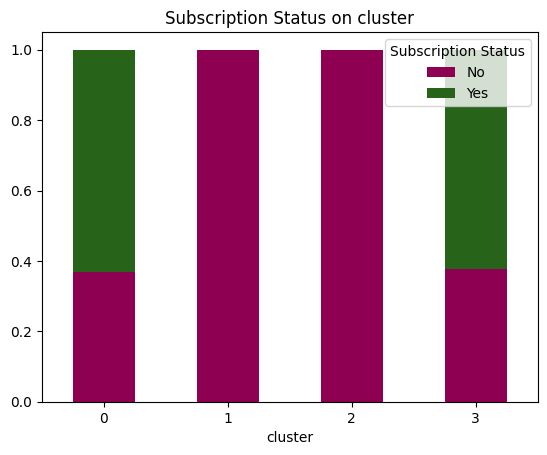

<Figure size 1000x500 with 0 Axes>

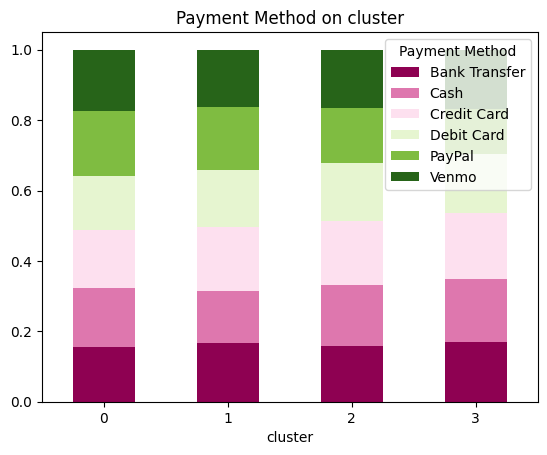

<Figure size 1000x500 with 0 Axes>

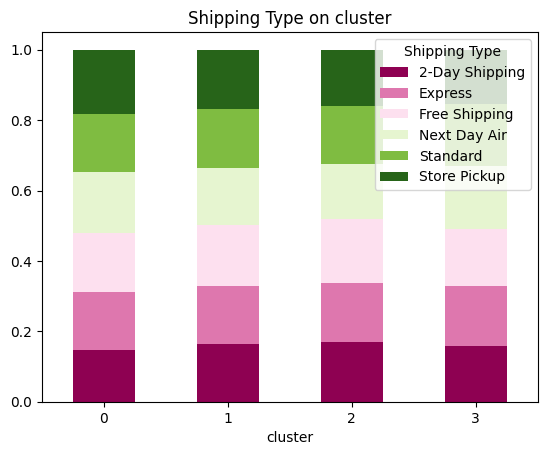

<Figure size 1000x500 with 0 Axes>

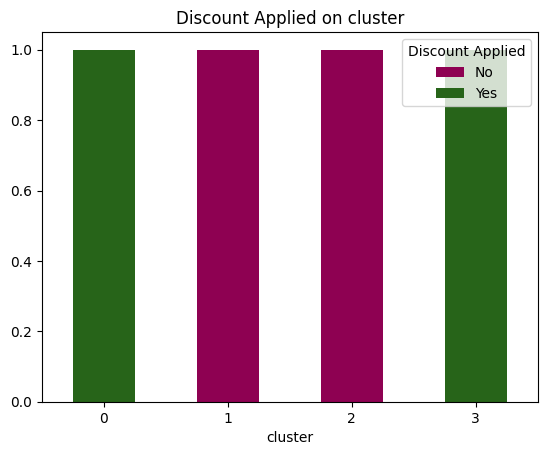

<Figure size 1000x500 with 0 Axes>

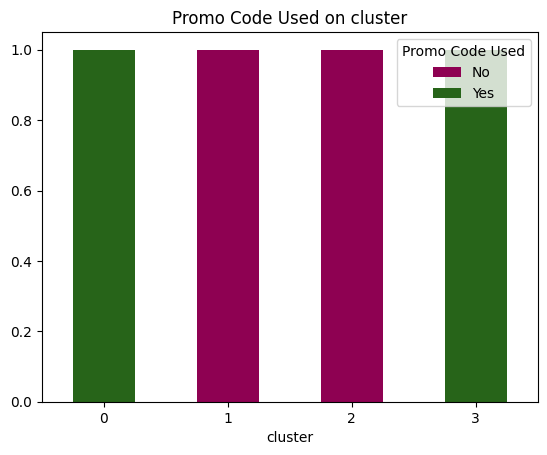

<Figure size 1000x500 with 0 Axes>

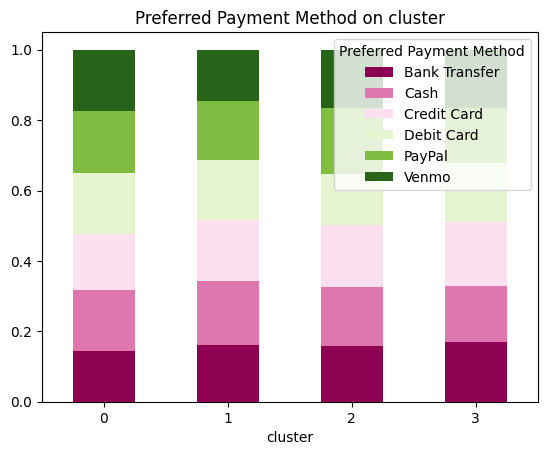

<Figure size 1000x500 with 0 Axes>

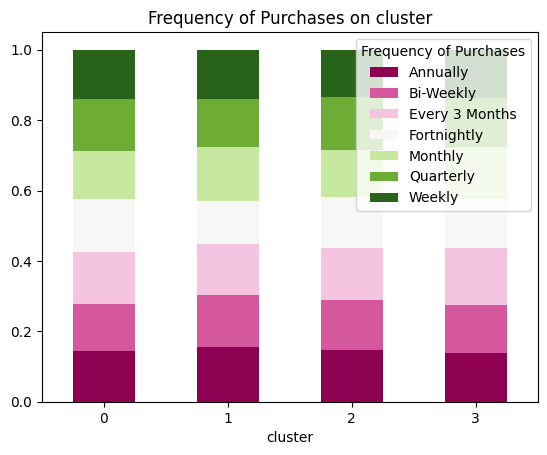

In [47]:
# Categorical
def cat_with_y(data, cols, target):
  for c in cols:
    plt.figure(figsize = (10, 5))

    data.groupby(target)[c].value_counts(normalize = True).unstack(c).plot.bar(stacked = True,
                                                                                    cmap = "PiYG")
    plt.title(f"{c} on {target}")
    plt.xticks(rotation = 0)

    plt.show()

cat_with_y(df,
           categorical,
           "cluster")

In [45]:
for c in categorical:
  pivot_df = df.groupby(['cluster', c]).size().unstack(fill_value=0)
  display(pivot_df)

Gender,Female,Male
cluster,,
0,0,943
1,556,451
2,692,524
3,0,734


Category,Accessories,Clothing,Footwear,Outerwear
cluster,,,,
0,543,0,259,141
1,0,1006,0,1
2,697,0,340,179
3,0,731,0,3


Location,Midwest,Northeast,South,West
cluster,,,,
0,244,148,301,250
1,237,177,314,279
2,288,224,403,301
3,168,125,253,188


Size,L,M,S,XL
cluster,,,,
0,257,421,171,94
1,283,457,154,113
2,313,556,208,139
3,200,321,130,83


Color,Colorful,Neutral
cluster,,
0,681,262
1,730,277
2,890,326
3,517,217


Season,Fall,Spring,Summer,Winter
cluster,,,,
0,245,235,239,224
1,275,250,224,258
2,303,309,308,296
3,152,205,184,193


Subscription Status,No,Yes
cluster,,
0,348,595
1,1007,0
2,1216,0
3,276,458


Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
cluster,,,,,,
0,147,158,155,146,172,165
1,168,149,182,163,180,165
2,193,209,222,200,192,200
3,124,132,137,124,94,123


Shipping Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
cluster,,,,,,
0,138,155,158,164,156,172
1,164,166,175,163,170,169
2,208,201,222,190,199,196
3,117,124,120,131,129,113


Discount Applied,No,Yes
cluster,,
0,0,943
1,1007,0
2,1216,0
3,0,734


Promo Code Used,No,Yes
cluster,,
0,0,943
1,1007,0
2,1216,0
3,0,734


Preferred Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
cluster,,,,,,
0,135,165,148,166,165,164
1,162,183,174,173,167,148
2,191,204,217,174,230,200
3,124,118,132,123,115,122


Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
cluster,,,,,,,
0,136,127,139,140,129,139,133
1,156,149,146,122,155,137,142
2,178,172,180,177,161,185,163
3,102,99,119,103,108,102,101


Based on the plots above, we can gain some insights:
- **Gender on cluster**  
Cluster 0 and 3 consist entirely of male customers, while clusters 1 and 2 are still variated between males and females.
- **Category on cluster**  
Clusters 1 and 3 are only interested in buying clothes, making them ideal targets for clothing promotions. On the other hand, clusters 0 and 2 show no interest in buying clothes at all, so it won't be necessary to give them clothing promotion.
- **Subscription Status**, **Discount Applied**, and **Promo Code Used** **on cluster**  
Uniquely, all customers in clusters 0 and 3 have subscriptions, using discount and promo codes. This suggests that the male customers are more interested in buying things with subscription benefits, discounts, and promos. Since there are no female customers in these clusters, discounts or promos are unlikely to appeal to female customers.
- **Location**, **Size**, **Color**, **Season**, **Shipping Type**, **Payment Method**, **Preferred Payment Method**, and **Frequency of Purchases** doesn't really impact the clustering.

#### **Final Conclusion**

To address our main goals, here's how product promotions should be given for each customer cluster:
- Cluster 0 shows no interest in clothing or female product promotions.
- Cluster 1 is only interested in clothing, but doesn't really rely on discounts or promo on their previous purchases, meaning that giving promotions isn't necessary for them to buy products from our company.
- Cluster 2 is interested in non-clothing products, but also doesn't really rely on promotions, meaning that giving promotions is also not necessary for them to buy products from our company.
- Cluster 3 is only interested in clothing products, and doesn't need any female product promotion.